In [1]:
# MULTICLASS CLASSFIACTION (WITH TEXT , NO TEXT , WITH TICKER  ,NO TICKER) ALL IN ONE

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final_dataset.csv')
df.head()  # View the standardized data


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03-06-2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21


In [3]:
def group_ratings(rating):
    if rating in ['AAA', 'AA']:
        return 'AA+'
    elif rating in ['CCC' , 'C' , 'D' , 'CC']:
        return 'CCC–'
    else:
        return rating

df['Rating'] = df['Rating'].apply(group_ratings)

In [4]:
import numpy as np
np.unique(df["Rating"])

array(['A', 'AA+', 'B', 'BB', 'BBB', 'CCC–'], dtype=object)

In [5]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,03-06-2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,AA+,"Gartner, Inc.",IT,Egan-Jones Ratings Company,2/18/2016,Consumer Services,0.862111,0.720623,0.281812,97.999541,...,0.159756,2.164291,1.554895,0.499336,1.144049,0.948107,0.145376,0.436129,0.486695,10.42
1485,B,SBA Communications Corporation,SBAC,Standard & Poor's Ratings Services,8/28/2013,Consumer Services,0.459629,0.266021,0.163323,19.955103,...,0.381332,16.799152,0.523903,0.611220,1.637197,0.349269,0.218293,0.414757,0.261952,12.08
1486,AA+,Imperial Oil Limited,IMO,DBRS,10-07-2016,Energy,0.986608,0.886943,0.100695,26.994041,...,0.073664,0.000000,0.000000,0.000000,4.716981,0.000000,0.000000,0.943396,0.000000,15.35
1487,BBB,"NVR, Inc.",NVR,Moody's Investors Service,09-05-2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.083018,15.758348,1.847731,0.783593,1.518816,1.364032,0.212828,0.222502,0.657831,12.16


In [6]:
df["Rating"].value_counts()

Rating
BBB     511
BB      333
A       320
B       190
AA+      87
CCC–     48
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sector'] = label_encoder.fit_transform(df['Sector'])

label_encoder2 = LabelEncoder()
df['Symbol'] = label_encoder.fit_transform(df['Symbol'])

label_encoder3 = LabelEncoder()
df['Rating'] = label_encoder3.fit_transform(df['Rating'])

In [8]:
df

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,0,Whirlpool Corporation,420,Egan-Jones Ratings Company,11/27/2015,2,0.945894,0.426395,0.099690,44.203245,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,4,Whirlpool Corporation,420,Egan-Jones Ratings Company,2/13/2014,2,1.033559,0.498234,0.203120,38.991156,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,4,Whirlpool Corporation,420,Fitch Ratings,03-06-2015,2,0.963703,0.451505,0.122099,50.841385,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,4,Whirlpool Corporation,420,Fitch Ratings,6/15/2012,2,1.019851,0.510402,0.176116,41.161738,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,4,Whirlpool Corporation,420,Standard & Poor's Ratings Services,10/24/2016,2,0.957844,0.495432,0.141608,47.761126,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1,"Gartner, Inc.",199,Egan-Jones Ratings Company,2/18/2016,4,0.862111,0.720623,0.281812,97.999541,...,0.159756,2.164291,1.554895,0.499336,1.144049,0.948107,0.145376,0.436129,0.486695,10.42
1485,2,SBA Communications Corporation,335,Standard & Poor's Ratings Services,8/28/2013,4,0.459629,0.266021,0.163323,19.955103,...,0.381332,16.799152,0.523903,0.611220,1.637197,0.349269,0.218293,0.414757,0.261952,12.08
1486,1,Imperial Oil Limited,193,DBRS,10-07-2016,5,0.986608,0.886943,0.100695,26.994041,...,0.073664,0.000000,0.000000,0.000000,4.716981,0.000000,0.000000,0.943396,0.000000,15.35
1487,4,"NVR, Inc.",278,Moody's Investors Service,09-05-2012,1,11.757767,7.115059,7.057420,1.079762,...,0.083018,15.758348,1.847731,0.783593,1.518816,1.364032,0.212828,0.222502,0.657831,12.16


In [9]:
# label_encoder.classes_

In [10]:
df.drop(["Name" , "Date" , "Rating Agency Name"] , axis = 1 , inplace = True)
df

,Rating,Symbol,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,0,420,2,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,...,0.058638,3.906655,1.514332,1.045610,1.820804,1.225888,0.216333,0.450694,0.946458,10.72
1,4,420,2,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,...,0.067239,4.002846,2.379140,0.875523,1.617815,1.427484,0.209364,0.399695,0.590027,10.31
2,4,420,2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,...,0.074426,3.483510,2.555911,0.778754,1.757188,1.357827,0.139776,0.399361,0.459265,10.48
3,4,420,2,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,...,0.028394,4.581150,2.580837,1.275586,1.483239,1.216256,0.148324,0.355977,0.504301,11.19
4,4,420,2,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,...,0.058065,3.857790,1.231846,1.154046,2.035788,0.635373,0.207469,0.414938,0.920643,11.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1,199,4,0.862111,0.720623,0.281812,97.999541,0.081198,0.125846,0.612088,...,0.159756,2.164291,1.554895,0.499336,1.144049,0.948107,0.145376,0.436129,0.486695,10.42
1485,2,335,4,0.459629,0.266021,0.163323,19.955103,-0.042847,-0.043850,0.687130,...,0.381332,16.799152,0.523903,0.611220,1.637197,0.349269,0.218293,0.414757,0.261952,12.08
1486,1,193,5,0.986608,0.886943,0.100695,26.994041,0.079147,0.089347,1.000000,...,0.073664,0.000000,0.000000,0.000000,4.716981,0.000000,0.000000,0.943396,0.000000,15.35
1487,4,278,1,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,...,0.083018,15.758348,1.847731,0.783593,1.518816,1.364032,0.212828,0.222502,0.657831,12.16


In [11]:
columns_to_standardize = df.columns[1:]
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('standardized_dataset.csv', index=False)
df

,Rating,Symbol,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,0,1.595526,-0.824698,-0.060702,-0.068602,-0.147666,-0.069133,-0.039618,-0.042436,-0.542408,...,-0.064850,-0.051142,0.175272,0.913171,0.810471,0.859724,0.165990,0.289363,0.945833,-0.046131
1,4,1.595526,-0.824698,-0.058993,-0.066727,-0.122688,-0.070148,-0.038469,-0.042492,-0.543984,...,-0.064444,-0.051033,1.513844,0.358279,0.483632,1.224594,0.112018,0.092125,-0.070330,-0.120508
2,4,1.595526,-0.824698,-0.060354,-0.067947,-0.142254,-0.067839,-0.040450,-0.043002,-0.552371,...,-0.064104,-0.051620,1.787455,0.042578,0.708041,1.098523,-0.426932,0.090832,-0.443123,-0.089669
3,4,1.595526,-0.824698,-0.059260,-0.066409,-0.129210,-0.069725,-0.042511,-0.049447,-0.608807,...,-0.066280,-0.050380,1.826036,1.663444,0.266948,0.842292,-0.360732,-0.076955,-0.314728,0.039130
4,4,1.595526,-0.824698,-0.060469,-0.066800,-0.137543,-0.068440,-0.038679,-0.041938,-0.540533,...,-0.064877,-0.051197,-0.261966,1.266931,1.156623,-0.209053,0.097338,0.151075,0.872238,0.042758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,1,-0.164021,-0.247506,-0.062334,-0.060920,-0.103684,-0.058651,-0.031991,-0.033816,0.207196,...,-0.060071,-0.053110,0.238057,-0.868995,-0.279192,0.356966,-0.383560,0.233033,-0.364923,-0.100553
1485,2,0.918777,-0.247506,-0.070177,-0.072790,-0.132299,-0.073858,-0.053630,-0.052939,0.336376,...,-0.049598,-0.036578,-1.357740,-0.503985,0.514840,-0.726876,0.181169,0.150374,-1.005653,0.200582
1486,1,-0.211791,0.041090,-0.059908,-0.056577,-0.147423,-0.072486,-0.032349,-0.037929,0.874956,...,-0.064140,-0.055555,-2.168651,-2.498032,5.473689,-1.359020,-1.509481,2.194898,-1.752461,0.793781
1487,4,0.464958,-1.113294,0.149986,0.106042,1.532614,-0.077536,-0.036264,-0.038264,0.874956,...,-0.063698,-0.037754,0.691317,0.058365,0.324231,1.109753,0.138841,-0.593175,0.122976,0.215094


In [12]:
X = df.drop(["Rating"] , axis = 1)
y = df["Rating"]

In [13]:
# ! pip install catboost xgboost lightgbm

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score

In [15]:
Model_list = {
    "CatBoost":0,
    "KNN-Unif":1,
    "KNN-Dist":	2,
	"ExtraTrees-Entr":3,	
	"ExtraTrees-Gini":4,	
	"LightGBM":5,
	"RForest-Ent":6,	
	"RForest-Gini":7,	
	"XGBoost":8,
	"Ensemble":9,	
}

In [16]:
# 1
def Logistic(X_train,X_test , y_train , y_test):
    logistic_regression = LogisticRegression(max_iter=10000)
    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    return accuracy_score(y_test,y_pred)

# 2
def Svm(X_train,X_test , y_train , y_test):
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    # print(confusion_matrix(y_test, y_pred))
    return accuracy_score(y_test,y_pred)

# 3
def catboost(X_train,X_test , y_train , y_test):
    catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=False)
    catboost_model.fit(X_train, y_train)
    y_pred_catboost = catboost_model.predict(X_test)
    return accuracy_score(y_test, y_pred_catboost)
    # conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# 4
def xgboost(X_train,X_test , y_train , y_test):
    xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss')
    xgboost_model.fit(X_train, y_train)
    y_pred_xgboost = xgboost_model.predict(X_test)
    return accuracy_score(y_test, y_pred_xgboost)

# 5
def lightgbm(X_train,X_test , y_train , y_test):
    lightgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3 , verbose = -1)
    lightgbm_model.fit(X_train, y_train)
    y_pred_lightgbm = lightgbm_model.predict(X_test)
    return accuracy_score(y_test, y_pred_lightgbm)

# 6
def lightgbm_xt(X_train, X_test, y_train, y_test):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',        # Adjust this for multi-class
        'extra_trees': True,          # Enables extra trees mode
        'num_leaves': 31,
        'learning_rate': 0.05,
        'n_estimators': 100,
        'random_state': 42
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# 7
def lightgbm_large(X_train, X_test, y_train, y_test):
    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',        # Adjust this for multi-class
        'num_leaves': 255,            # Increased to handle large data
        'learning_rate': 0.01,        # Lower learning rate
        'n_estimators': 1000,         # More trees for larger datasets
        'max_depth': -1,              # Allow deeper trees
        'random_state': 42
    }
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


# 8
def random_forest_gini(X_train, X_test, y_train, y_test):
    rf_gini_model = RandomForestClassifier(criterion='gini', max_depth=6, random_state=42)
    rf_gini_model.fit(X_train, y_train)
    y_pred_gini = rf_gini_model.predict(X_test)
    return accuracy_score(y_test, y_pred_gini)

# 9
def random_forest_entropy(X_train, X_test, y_train, y_test):
    rf_entropy_model = RandomForestClassifier(criterion='entropy', max_depth=6, random_state=42)
    rf_entropy_model.fit(X_train, y_train)
    y_pred_entropy = rf_entropy_model.predict(X_test)
    return accuracy_score(y_test, y_pred_entropy)

# 10
def decision_tree(X_train,X_test , y_train , y_test):
    dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    return accuracy_score(y_test, y_pred_dt)
    # conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# 11
def extratree_gini(X_train, X_test, y_train, y_test):
    et_gini_model = ExtraTreesClassifier(criterion='gini', max_depth=6, random_state=42)
    et_gini_model.fit(X_train, y_train)
    y_pred_gini = et_gini_model.predict(X_test)
    return accuracy_score(y_test, y_pred_gini)

# 12
def extratree_entropy(X_train, X_test, y_train, y_test):
    et_entropy_model = ExtraTreesClassifier(criterion='entropy', max_depth=6, random_state=42)
    et_entropy_model.fit(X_train, y_train)
    y_pred_entropy = et_entropy_model.predict(X_test)
    return accuracy_score(y_test, y_pred_entropy)

# 13
def knn_unif(X_train, X_test, y_train, y_test):
    knn_unif_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Uniform weights
    knn_unif_model.fit(X_train, y_train)
    y_pred_unif = knn_unif_model.predict(X_test)
    return accuracy_score(y_test, y_pred_unif)

# 14
def knn_dist(X_train, X_test, y_train, y_test):
    knn_dist_model = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Distance-based weights
    knn_dist_model.fit(X_train, y_train)
    y_pred_dist = knn_dist_model.predict(X_test)
    return accuracy_score(y_test, y_pred_dist)

In [17]:
import numpy as np
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

def stack_ensemble(X_train, X_test, y_train, y_test, n_splits=5):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    # Define base models for the first layer
    base_models = [
        ("catboost", CatBoostClassifier(iterations=100, learning_rate=0.05, depth=6, verbose=False)),
        ("lightgbm_small", LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, verbose=-1)),
        ("lightgbm_large", LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=10, verbose=-1)),
        ("random_forest", RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42)),
        ("extra_trees", ExtraTreesClassifier(n_estimators=100, max_depth=8, random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=3)),
        ("xgboost", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)),
        ("svc", SVC(probability=True, C=1, kernel='rbf', gamma='scale')),
        ("naive_bayes", GaussianNB()),  # Added Naive Bayes
        ("bagging_rf", BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50))  # Added Bagging with RF
    ]

    # Prepare for stacking
    stack_train = np.zeros((X_train.shape[0], len(base_models)))
    stack_test = np.zeros((X_test.shape[0], len(base_models)))

    # Stratified K-Folds for base models
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Train each base model and store their predictions for stacking
    for i, (name, model) in enumerate(base_models):
        fold_train = np.zeros((X_train.shape[0],))
        fold_test = np.zeros((X_test.shape[0], n_splits))

        for j, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
            # Split data using the indices provided by K-Fold
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Fit the model on this fold
            model.fit(X_fold_train, y_fold_train)

            # Predict validation set (for stacking), flatten the predictions to avoid shape mismatch
            fold_train[val_idx] = model.predict(X_fold_val).ravel()
            fold_test[:, j] = model.predict(X_test).ravel()

        stack_train[:, i] = fold_train
        stack_test[:, i] = fold_test.mean(axis=1)

    # Define second layer models using a more complex stacking approach
    second_layer_models = [
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)),
        ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu'))  # Added MLP
    ]

    # Stack the predictions from the first layer models using a StackingClassifier
    stacker = StackingClassifier(
        estimators=second_layer_models,
        final_estimator=LogisticRegression(),
        cv=n_splits
    )

    # Fit the stacker model on the first layer's outputs
    stacker.fit(stack_train, y_train)

    # Final predictions using the stacker
    final_predictions = stacker.predict(stack_test)

    return accuracy_score(y_test, final_predictions)

In [18]:
import warnings
warnings.filterwarnings('ignore')

def run_model(X,y , text , table , name_of_csv):
    X_train,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
    # print(X_train.shape , X_test.shape , y_train.shape , y_test.shape )
    table.loc[0, text] = 100*catboost(X_train,X_test , y_train , y_test)
    table.loc[1, text] = 100*extratree_entropy(X_train,X_test , y_train , y_test)
    table.loc[2, text] = 100*extratree_gini(X_train,X_test , y_train , y_test)
    table.loc[3, text] = 100*knn_dist(X_train,X_test , y_train , y_test)
    table.loc[4, text] = 100*knn_unif(X_train,X_test , y_train , y_test)
    table.loc[5, text] = 100*lightgbm(X_train,X_test , y_train , y_test)
    table.loc[6, text] = 100*lightgbm_large(X_train,X_test , y_train , y_test)
    table.loc[7, text] = 100*lightgbm_xt(X_train,X_test , y_train , y_test)
    table.loc[8, text] = 100*random_forest_entropy(X_train,X_test , y_train , y_test)
    table.loc[9, text] = 100*random_forest_gini(X_train,X_test , y_train , y_test)
    table.loc[10, text] = 100*xgboost(X_train,X_test , y_train , y_test)
    table.loc[11, text] = 100*stack_ensemble(X_train,X_test , y_train , y_test)

    table.to_csv(name_of_csv ,index=False)
    return table

In [19]:
# filename = "multiclass_with_ticker.csv"
# table = pd.read_csv("comparative_analysis.csv")
# run_model(X,y , "NLP", table , filename)         # nlp extracted features used 

# X2 = X.drop(["Negative","Positive","Uncertainty","Litigious","Strong_Modal","Weak_Modal","Constraining","Readability"] ,axis = 1)

# table2 = pd.read_csv(filename)
# run_model(X2 ,y , "No text" , table2 ,filename)   # no nlp extracted features used 

# Result1 = pd.read_csv(filename)
# Result1

In [20]:
accuracies_dict ={}


Epoch 1/500
38/38 [==============================] - 1s 6ms/step - loss: 1.7846 - accuracy: 0.2116 - val_loss: 1.7588 - val_accuracy: 0.2383
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: 1.7352 - accuracy: 0.2385 - val_loss: 1.6881 - val_accuracy: 0.2617
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 1.6704 - accuracy: 0.2720 - val_loss: 1.6196 - val_accuracy: 0.3221
Epoch 4/500
38/38 [==============================] - 0s 2ms/step - loss: 1.5771 - accuracy: 0.3333 - val_loss: 1.5307 - val_accuracy: 0.3523
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 1.4900 - accuracy: 0.3770 - val_loss: 1.4973 - val_accuracy: 0.3624
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: 1.4265 - accuracy: 0.4047 - val_loss: 1.4783 - val_accuracy: 0.3691
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: 1.3573 - accuracy: 0.4332 - val_loss: 1.4598 - val_accuracy: 0.4295
Epoch 8/500
3

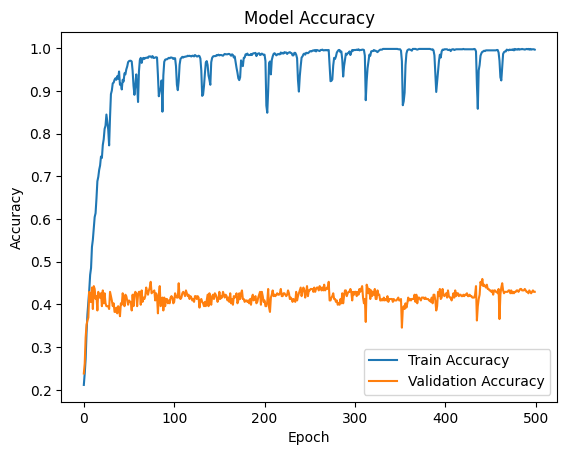

In [21]:
#  ANN trained model 

X_train,X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


y_train_1 = to_categorical(y_train, num_classes=6)
y_test_1 = to_categorical(y_test, num_classes=6)

# Define the model
model = Sequential()

# Input and Hidden Layers
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# Output Layer
model.add(Dense(6, activation='softmax'))  
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_1, epochs=500 , batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict['ANN'] = accuracy * 100


# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/200
38/38 [==============================] - 3s 21ms/step - loss: 1.8052 - accuracy: 0.3258 - val_loss: 1.5773 - val_accuracy: 0.3624
Epoch 2/200
38/38 [==============================] - 1s 16ms/step - loss: 1.5885 - accuracy: 0.3275 - val_loss: 1.5685 - val_accuracy: 0.3624
Epoch 3/200
38/38 [==============================] - 0s 13ms/step - loss: 1.5806 - accuracy: 0.3384 - val_loss: 1.5707 - val_accuracy: 0.3624
Epoch 4/200
38/38 [==============================] - 0s 13ms/step - loss: 1.5808 - accuracy: 0.3384 - val_loss: 1.5706 - val_accuracy: 0.3624
Epoch 5/200
38/38 [==============================] - 1s 14ms/step - loss: 1.5808 - accuracy: 0.3384 - val_loss: 1.5683 - val_accuracy: 0.3624
Epoch 6/200
38/38 [==============================] - 1s 14ms/step - loss: 1.5738 - accuracy: 0.3384 - val_loss: 1.5817 - val_accuracy: 0.3624
Epoch 7/200
38/38 [==============================] - 1s 14ms/step - loss: 1.5841 - accuracy: 0.3384 - val_loss: 1.5686 - val_accuracy: 0.3624
Epoch 

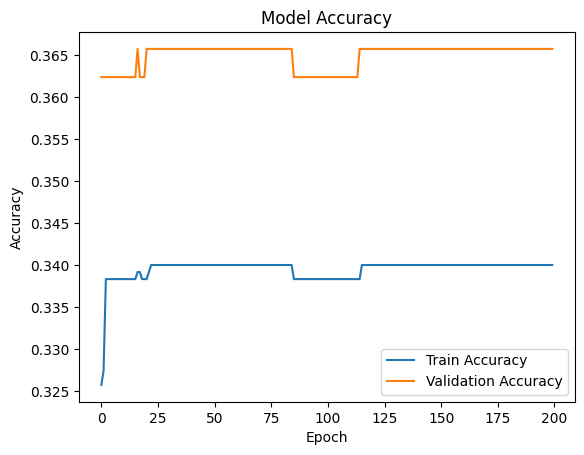

In [22]:
#  LSTM rnn model 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM


y_train_1 = to_categorical(y_train, num_classes=6)
y_test_1 = to_categorical(y_test, num_classes=6)

# Define the model
model = Sequential()

# Input and Hidden Layers
# model.add(LSTM(32,activation='relu',input_shape=(27)))
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(LSTM(100, activation='relu',input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
# Output Layer
model.add(Dense(6, activation='softmax'))  # 6 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_1, epochs=200 , batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict['LSTM'] = accuracy * 100

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Epoch 1/100
38/38 [==============================] - 12s 61ms/step - loss: 1.7220 - accuracy: 0.2107 - val_loss: 1.6820 - val_accuracy: 0.2148
Epoch 2/100
38/38 [==============================] - 1s 27ms/step - loss: 1.6477 - accuracy: 0.2149 - val_loss: 1.6272 - val_accuracy: 0.2148
Epoch 3/100
38/38 [==============================] - 1s 27ms/step - loss: 1.6009 - accuracy: 0.2771 - val_loss: 1.6068 - val_accuracy: 0.3624
Epoch 4/100
38/38 [==============================] - 1s 26ms/step - loss: 1.5762 - accuracy: 0.3384 - val_loss: 1.5764 - val_accuracy: 0.3624
Epoch 5/100
38/38 [==============================] - 1s 26ms/step - loss: 1.5712 - accuracy: 0.3409 - val_loss: 1.8149 - val_accuracy: 0.3658
Epoch 6/100
38/38 [==============================] - 1s 26ms/step - loss: 1.5534 - accuracy: 0.3501 - val_loss: 1.5646 - val_accuracy: 0.3691
Epoch 7/100
38/38 [==============================] - 1s 26ms/step - loss: 1.5434 - accuracy: 0.3501 - val_loss: 1.5908 - val_accuracy: 0.3691
Epoch

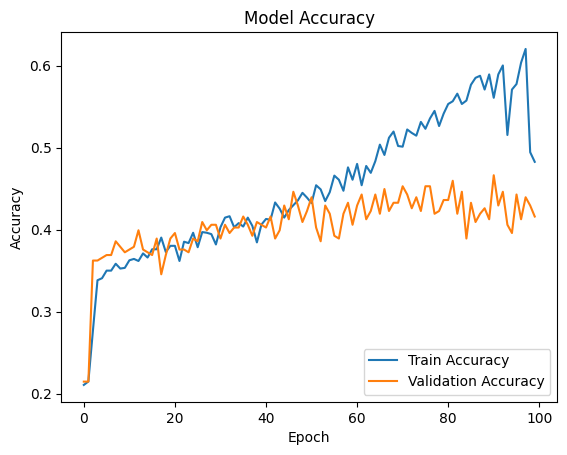

In [23]:
#  birectional rnn 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# One-hot encoding for the target labels
y_train_1 = to_categorical(y_train, num_classes=6)
y_test_1 = to_categorical(y_test, num_classes=6)

# Define the model
model = Sequential()

# Input and Bidirectional LSTM Layers
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=False), input_shape=(X_train.shape[1], 1)))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# Output Layer
model.add(Dense(6, activation='softmax'))  

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_1, epochs=100, batch_size=32, validation_data=(X_test, y_test_1), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["Bidirectional"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/200
38/38 [==============================] - 4s 21ms/step - loss: 1.6470 - accuracy: 0.2997 - val_loss: 1.5522 - val_accuracy: 0.3423
Epoch 2/200
38/38 [==============================] - 0s 8ms/step - loss: 1.5243 - accuracy: 0.3644 - val_loss: 1.5040 - val_accuracy: 0.3691
Epoch 3/200
38/38 [==============================] - 0s 8ms/step - loss: 1.4987 - accuracy: 0.3619 - val_loss: 1.4633 - val_accuracy: 0.3725
Epoch 4/200
38/38 [==============================] - 0s 7ms/step - loss: 1.4446 - accuracy: 0.3804 - val_loss: 1.4240 - val_accuracy: 0.3926
Epoch 5/200
38/38 [==============================] - 0s 8ms/step - loss: 1.3852 - accuracy: 0.4106 - val_loss: 1.3892 - val_accuracy: 0.4262
Epoch 6/200
38/38 [==============================] - 0s 8ms/step - loss: 1.3820 - accuracy: 0.4106 - val_loss: 1.4048 - val_accuracy: 0.4228
Epoch 7/200
38/38 [==============================] - 0s 8ms/step - loss: 1.3419 - accuracy: 0.4198 - val_loss: 1.4399 - val_accuracy: 0.3523
Epoch 8/200


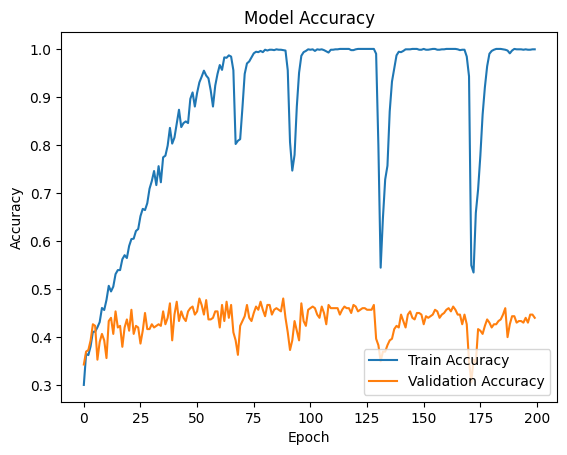

In [ ]:
#  simple rnn

from tensorflow.keras.layers import SimpleRNN

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train as usual
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_1, epochs=200, batch_size=32, validation_data=(X_test, y_test_1))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["Simple RNN"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/200
38/38 [==============================] - 7s 48ms/step - loss: 1.7323 - accuracy: 0.3048 - val_loss: 1.5938 - val_accuracy: 0.3624
Epoch 2/200
38/38 [==============================] - 1s 16ms/step - loss: 1.5879 - accuracy: 0.3392 - val_loss: 1.5655 - val_accuracy: 0.3658
Epoch 3/200
38/38 [==============================] - 1s 14ms/step - loss: 1.5829 - accuracy: 0.3392 - val_loss: 1.5810 - val_accuracy: 0.3658
Epoch 4/200
38/38 [==============================] - 1s 14ms/step - loss: 1.5859 - accuracy: 0.3401 - val_loss: 1.5605 - val_accuracy: 0.3658
Epoch 5/200
38/38 [==============================] - 1s 15ms/step - loss: 1.5786 - accuracy: 0.3392 - val_loss: 1.5596 - val_accuracy: 0.3658
Epoch 6/200
38/38 [==============================] - 1s 15ms/step - loss: 1.5739 - accuracy: 0.3401 - val_loss: 1.5609 - val_accuracy: 0.3658
Epoch 7/200
38/38 [==============================] - 1s 17ms/step - loss: 1.5703 - accuracy: 0.3392 - val_loss: 1.5756 - val_accuracy: 0.3691
Epoch 

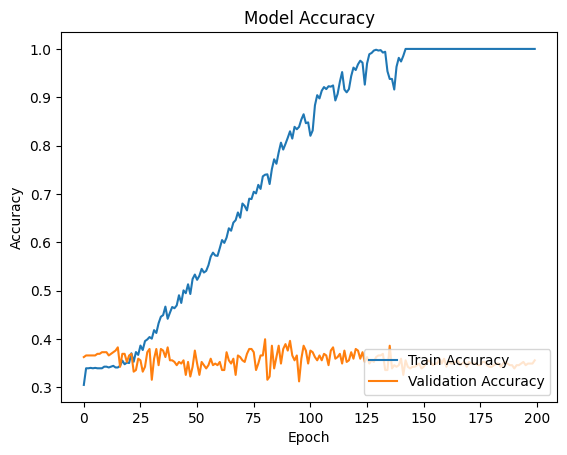

In [ ]:
# gru 

from tensorflow.keras.layers import GRU

# Define the GRU model
model = Sequential()
model.add(GRU(100, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_1, epochs=200, batch_size=32, validation_data=(X_test, y_test_1))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["GRU"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Epoch 1/100
38/38 [==============================] - 2s 10ms/step - loss: 1.6990 - accuracy: 0.3157 - val_loss: 1.5992 - val_accuracy: 0.3792
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 1.5928 - accuracy: 0.3207 - val_loss: 1.5544 - val_accuracy: 0.3792
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 1.5389 - accuracy: 0.3510 - val_loss: 1.4949 - val_accuracy: 0.3859
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 1.4839 - accuracy: 0.3518 - val_loss: 1.4654 - val_accuracy: 0.4094
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 1.4481 - accuracy: 0.3837 - val_loss: 1.4643 - val_accuracy: 0.4195
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 1.4430 - accuracy: 0.3686 - val_loss: 1.4381 - val_accuracy: 0.4128
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 1.4160 - accuracy: 0.3879 - val_loss: 1.4261 - val_accuracy: 0.4329
Epoch 8/100


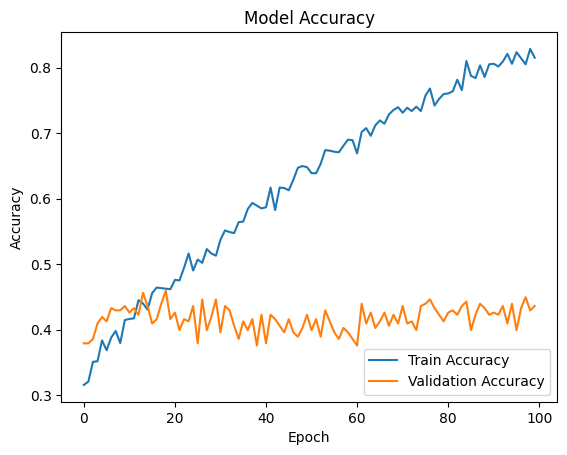

In [ ]:
# cnn 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))  # 2 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train_1, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test_1))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test_1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

accuracies_dict["CNN"] = accuracy*100

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [ ]:
for key, value in accuracies_dict.items():
    print(f"{key}: {value}")

ANN: 42.953020334243774
LSTM: 36.57718002796173
Bidirectional: 41.61073863506317
Simple RNN: 43.95973086357117
GRU: 35.57046949863434
CNN: 43.62415969371796


In [25]:
X = df.drop(["Symbol" , "Rating"] , axis=1)
X

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,operatingCashFlowSalesRatio,payablesTurnover,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Readability
0,-0.824698,-0.060702,-0.068602,-0.147666,-0.069133,-0.039618,-0.042436,-0.542408,-0.045665,-0.023516,...,-0.064850,-0.051142,0.175272,0.913171,0.810471,0.859724,0.165990,0.289363,0.945833,-0.046131
1,-0.824698,-0.058993,-0.066727,-0.122688,-0.070148,-0.038469,-0.042492,-0.543984,-0.045225,0.083880,...,-0.064444,-0.051033,1.513844,0.358279,0.483632,1.224594,0.112018,0.092125,-0.070330,-0.120508
2,-0.824698,-0.060354,-0.067947,-0.142254,-0.067839,-0.040450,-0.043002,-0.552371,-0.045816,-0.101211,...,-0.064104,-0.051620,1.787455,0.042578,0.708041,1.098523,-0.426932,0.090832,-0.443123,-0.089669
3,-0.824698,-0.059260,-0.066409,-0.129210,-0.069725,-0.042511,-0.049447,-0.608807,-0.047332,-0.162053,...,-0.066280,-0.050380,1.826036,1.663444,0.266948,0.842292,-0.360732,-0.076955,-0.314728,0.039130
4,-0.824698,-0.060469,-0.066800,-0.137543,-0.068440,-0.038679,-0.041938,-0.540533,-0.045329,0.022738,...,-0.064877,-0.051197,-0.261966,1.266931,1.156623,-0.209053,0.097338,0.151075,0.872238,0.042758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,-0.247506,-0.062334,-0.060920,-0.103684,-0.058651,-0.031991,-0.033816,0.207196,-0.039406,0.330222,...,-0.060071,-0.053110,0.238057,-0.868995,-0.279192,0.356966,-0.383560,0.233033,-0.364923,-0.100553
1485,-0.247506,-0.070177,-0.072790,-0.132299,-0.073858,-0.053630,-0.052939,0.336376,-0.035662,-0.465358,...,-0.049598,-0.036578,-1.357740,-0.503985,0.514840,-0.726876,0.181169,0.150374,-1.005653,0.200582
1486,0.041090,-0.059908,-0.056577,-0.147423,-0.072486,-0.032349,-0.037929,0.874956,-0.043233,0.072904,...,-0.064140,-0.055555,-2.168651,-2.498032,5.473689,-1.359020,-1.509481,2.194898,-1.752461,0.793781
1487,-1.113294,0.149986,0.106042,1.532614,-0.077536,-0.036264,-0.038264,0.874956,-0.044238,0.228005,...,-0.063698,-0.037754,0.691317,0.058365,0.324231,1.109753,0.138841,-0.593175,0.122976,0.215094


In [ ]:
# filename = "multiclass_without_ticker.csv"
# table = pd.read_csv("comparative_analysis.csv")
# run_model(X,y , "NLP", table , filename) # nlp extracted features used 

# X = X.drop(["Negative","Positive","Uncertainty","Litigious","Strong_Modal","Weak_Modal","Constraining","Readability"] ,axis = 1)

# table2 = pd.read_csv(filename)
# run_model(X ,y , "No text" , table2 ,filename)   # no nlp extracted features used 

# Result2 = pd.read_csv(filename)

In [27]:
Result1  # multiclass with ticker

,Model,No text,NLP
0,CatBoost,50.671141,52.013423
1,ExtraTrees-Entr,39.261745,38.255034
2,ExtraTrees-Gini,39.597315,38.255034
3,KNN-Dist,55.033557,43.959732
4,KNN-Unif,48.322148,40.939597
5,LightGBM,54.026846,54.697987
6,LightGBM-Large,61.073826,58.389262
7,LightGBM-XT,61.409396,53.691275
8,RForest-Ent,51.342282,48.657718
9,RForest-Gini,50.335570,49.328859


In [28]:
Result2 # multiclass without ticker

,Model,No text,NLP
0,CatBoost,55.369128,52.348993
1,ExtraTrees-Entr,38.590604,37.583893
2,ExtraTrees-Gini,38.255034,37.919463
3,KNN-Dist,50.671141,41.610738
4,KNN-Unif,48.657718,36.912752
5,LightGBM,52.013423,53.355705
6,LightGBM-Large,59.395973,57.382550
7,LightGBM-XT,58.389262,54.026846
8,RForest-Ent,49.664430,48.322148
9,RForest-Gini,52.348993,48.993289
